# 1. Import pandas under the alias pd

In [1]:
import pandas as pd

# 2. Print the version of pandas that has been imported.

In [2]:
pd.__version__

'2.2.3'

# 3. Print out all the version information of the libraries that are required by the pandas library

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit                : 0691c5cf90477d3503834d983f69350f250a6ff7
python                : 3.13.1
python-bits           : 64
OS                    : Windows
OS-release            : 11
Version               : 10.0.22631
machine               : AMD64
processor             : AMD64 Family 23 Model 160 Stepping 0, AuthenticAMD
byteorder             : little
LC_ALL                : None
LANG                  : None
LOCALE                : English_India.1252

pandas                : 2.2.3
numpy                 : 2.2.0
pytz                  : 2025.1
dateutil              : 2.9.0.post0
pip                   : 25.0
Cython                : None
sphinx                : None
IPython               : 8.32.0
adbc-driver-postgresql: None
adbc-driver-sqlite    : None
bs4                   : 4.13.1
blosc                 : None
bottleneck            : None
dataframe-api-compat  : None
fastparquet           : None
fsspec                : None
html5lib              : Non

# 4. Create a DataFrame df from this dictionary data which has the index labels.

In [4]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data=data, index=labels)
df.head()

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


# 5. Display a summary of the basic information about this DataFrame and its data (hint: there is a single method that can be called on the DataFrame).

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None


# 6. Return the first 3 rows of the DataFrame df.

In [6]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


# 7. Select just the 'animal' and 'age' columns from the DataFrame df.

In [7]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


# 8. Select the data in rows [3, 4, 8] and in columns ['animal', 'age'].

In [8]:
df.loc[df.index[[3,4,8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


# 9. Select only the rows where the number of visits is equal to 3.

In [9]:
df[df['visits']==3]

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


# 10. Select the rows where the age is missing, i.e. it is NaN.

In [10]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


# 11. Select the rows where the animal is a cat and the age is less than 3

In [11]:
df[(df['animal']=='cat') & (df['age']<3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


# 12. Select the rows the age is between 2 and 4 (inclusive)

In [12]:
df[(df['age']>=2) & (df['age']<=4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


# 13. Change the age in row 'f' to 1.5

In [13]:
df.loc['f', 'age'] = 1.5
df.tail()

,animal,age,visits,priority
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


# 14. Calculate the sum of all visits in df (i.e. find the total number of visits).

In [14]:

print(df['visits'].sum())

19


# 15. Calculate the mean age for each different animal in df

In [15]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

# 16. Append a new row 'k' to df with your choice of values for each column. 

In [16]:
df.loc['k'] = ['dog', 34,5,'yes']
df.loc['k']

animal       dog
age         34.0
visits         5
priority     yes
Name: k, dtype: object

# 17. Then delete that row to return the original DataFrame.

In [17]:
df.tail()

,animal,age,visits,priority
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no
k,dog,34.0,5,yes


# 18. Count the number of each type of animal in df.

In [18]:
#df.groupby([df['animal']]).count()
df.animal.value_counts()

animal
dog      5
cat      4
snake    2
Name: count, dtype: int64

In [19]:
df['animal'].value_counts()

animal
dog      5
cat      4
snake    2
Name: count, dtype: int64

# 19. Sort df first by the values in the 'age' in decending order, then by the value in the 'visits' column in ascending order (so row i should be first, and row d should be last).

In [20]:
df.sort_values(by = ['age','visits'], ascending=[False,True])

,animal,age,visits,priority
k,dog,34.0,5,yes
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes


# 20. The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be True and 'no' should be False.

In [21]:
repl = {'yes': True, 'no':False}
df['priority'] = df['priority'].map(repl)

In [22]:
df.head()

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False


# 21. In the 'animal' column, change the 'snake' entries to 'python'.

In [23]:
df['animal'] = df['animal'].replace('snake', 'python')
df.head()

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False


# 22. For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [24]:
df.pivot_table(index = 'animal', columns='visits', values='age', aggfunc='mean')

visits,1,2,3,5
animal,,,,
cat,2.5,NaN,2.25,NaN
dog,3.0,6.0,NaN,34.0
python,4.5,0.5,NaN,NaN


# 23. You have a DataFrame df with a column 'A' of integers. For example:

df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
How do you filter out rows which contain the same integer as the row immediately above?



In [25]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.head()

,A
0,1
1,2
2,2
3,3
4,4


# 24. You should be left with a column containing the following values:

1, 2, 3, 4, 5, 6, 7

In [26]:
df.loc[df['A'].shift(1)!=df['A']]
df.drop_duplicates(subset='A')

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


# 25. Given a DataFrame of numeric values, say

df = pd.DataFrame(np.random.random(size=(5, 3)))  


In [27]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
df.head()

,0,1,2
0,0.943746,0.388354,0.772321
1,0.447214,0.187467,0.412214
2,0.074699,0.999661,0.938234
3,0.736039,0.971357,0.096296
4,0.180972,0.702428,0.247575


# 26. How do you subtract the row mean from each element in the row?

In [28]:
df = df.sub(df.mean(axis=1),axis=0)
df.head()

,0,1,2
0,0.242272,-0.313120,0.070848
1,0.098249,-0.161498,0.063249
2,-0.596166,0.328796,0.267369
3,0.134808,0.370126,-0.504934
4,-0.196019,0.325436,-0.129417


# 27. Suppose you have DataFrame with 10 columns of real numbers, for example:

#### df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))  


In [29]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df.head()

,a,b,c,d,e,f,g,h,i,j
0,0.559650,0.405626,0.120813,0.801635,0.802784,0.996267,0.413391,0.391893,0.966286,0.257547
1,0.995928,0.796098,0.091363,0.708094,0.033392,0.522867,0.029743,0.022146,0.533932,0.398639
2,0.127441,0.730912,0.097525,0.615592,0.056024,0.919593,0.651916,0.945898,0.548720,0.845834
3,0.213292,0.410860,0.652123,0.233565,0.476392,0.269733,0.985302,0.255993,0.315712,0.366236
4,0.526756,0.714938,0.297587,0.553017,0.763693,0.501989,0.962475,0.850587,0.071888,0.434553


# 28. Which column of numbers has the smallest sum?  Return that column's label.

In [30]:
df.sum().idxmin()

'c'

# 29. How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))

In [31]:
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
len(df.drop_duplicates(keep=False))

3

# 30. In the cell below, you have a DataFrame df that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values.

For each row of the DataFrame, find the column which contains the third NaN value.

You should return a Series of column labels: e, c, d, h, d

In [32]:
import numpy as np
import pandas as pd
nan = np.nan
data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')
df = pd.DataFrame(data, columns=columns)
def find_nan3(row):
    nc = 0
    for i, value in enumerate(row):
        if pd.isna(value):
            nc += 1
            if nc == 3:
                return df.columns[i]
    return None  
result = df.apply(find_nan3, axis=1)
print(result)


0    e
1    c
2    d
3    h
4    d
dtype: object


# 31. A DataFrame has a column of groups 'grps' and and column of integer values 'vals':

df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), <br>
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})<br>
For each group, find the sum of the three greatest values. You should end up with the answer as follows:<br>

grps
<br>a    409 <br> 
<br>b    156<br>
<br>c    345<br>

In [33]:
import pandas as pd
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12, 345, 3, 1, 45, 14, 4, 52, 54, 23, 235, 21, 57, 3, 87]})
result = df.groupby('grps')['vals'].apply(lambda x: x.nlargest(3).sum())
print(result)


grps
a    409
b    156
c    345
Name: vals, dtype: int64


# 32. The DataFrame df constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive).

For each group of 10 consecutive integers in 'A' (i.e. (0, 10], (10, 20], ...), calculate the sum of the corresponding values in column 'B'.<br>

The answer should be a Series as follows:
    <br>A<br>
(0, 10]      635<br>
(10, 20]     360<br>
(20, 30]     315<br>
(30, 40]     306<br>
(40, 50]     750<br>
(50, 60]     284<br>
(60, 70]     424<br>
(70, 80]     526<br>
(80, 90]     835<br>
(90, 100]    852    <br>                                                

In [34]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])
df.head()

,A,B
0,46,29
1,75,22
2,49,63
3,33,43
4,71,75


In [35]:
#ugly solution
'''
x1=df[(df['A']>0) & (df['A']<=10)].sum()
x2=df[(df['A']>10) & (df['A']<=20)].sum()
x3=df[(df['A']>20) & (df['A']<=30)].sum()
x2=df[(df['A']>30) & (df['A']<=40)].sum()
x2=df[(df['A']>40) & (df['A']<=50)].sum()
x2=df[(df['A']>50) & (df['A']<=60)].sum()
x2=df[(df['A']>60) & (df['A']<=70)].sum()
x2=df[(df['A']>70) & (df['A']<=80)].sum()
x2=df[(df['A']>80) & (df['A']<=90)].sum()
x2=df[(df['A']>90) & (df['A']<=100)].sum()
'''

df.groupby(pd.cut(df['A'], np.arange(0,101,10)))['B'].sum()

C:\Users\Sneha Karkoli\AppData\Local\Temp\ipykernel_5584\2041526266.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['A'], np.arange(0,101,10)))['B'].sum()


A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
Name: B, dtype: int32

# 33. Consider a DataFrame df where there is an integer column 'X':

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be

[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
Make this a new column 'Y'.

In [36]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

izero = np.r_[-1, (df == 0).values.nonzero()[0]]  # indices of zeros
idx = np.arange(len(df))
y = df['X'] != 0
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
df.head()

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2


# 34. Consider the DataFrame constructed below which contains rows and columns of numerical data.

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:

[(5, 7), (6, 4), (2, 5)]

In [37]:
df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))
df.head(20)

,0,1,2,3,4,5,6,7
0,38,38,46,46,13,24,3,54
1,18,47,4,42,8,66,50,46
2,62,36,19,19,77,17,7,63
3,28,47,46,65,63,12,16,24
4,14,51,34,56,29,59,92,79
5,58,76,96,45,38,76,58,40
6,10,34,48,40,37,23,41,26
7,55,70,91,27,79,92,20,31


In [38]:
df2 = df.unstack().copy()
df2.sort_values()[-3:].index.tolist()

[(5, 7), (6, 4), (2, 5)]

# 35. You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), <br>
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})<br>
Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:<br>

|     |vals   |  grps  |    patched_vals <br>|
|-----|-------|--------|---------------------|----
|  0  |  -12  |  A     |     13.6 <br>       | 
|  1  |  -7   |  B     |     28.0 <br>       | 
|  2  |  -14  |  A     |     13.6 <br>       |   
|  3  |   4   |  A     |      4.0 <br>       |
|  4  |   -7  |  A     |     13.6<br>        |
|  5  |   28  |  B     |     28.0<br>        |
|  6  |   -2  |  A     |     13.6<br>        |
|  7  |   -1  |  A     |     13.6<br>        |
|  8  |    8  |  A     |      8.0<br>        |
|  9  |   -2  |  B     |     28.0<br>        |
|  10 |   28  |  A     |     28.0<br>        |
|  11 |   12  |  A     |     12.0<br>        |
|  12 |   16  |  A     |     16.0<br>        |
|  13 |  -24  |  A     |     13.6<br>        |
|  14 |  -12  |  A     |     13.6<br>        |

In [39]:
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
df.head(10)

,vals,grps
0,-12,A
1,-7,B
2,-14,A
3,4,A
4,-7,A
5,28,B
6,-2,A
7,-1,A
8,8,A
9,-2,B


In [40]:
def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df.groupby(['grps'])['vals'].transform(replace)


C:\Users\Sneha Karkoli\AppData\Local\Temp\ipykernel_5584\2835002468.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.6' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  group[mask] = group[~mask].mean()


0     13.6
1     28.0
2     13.6
3      4.0
4     13.6
5     28.0
6     13.6
7     13.6
8      8.0
9     28.0
10    28.0
11    12.0
12    16.0
13    13.6
14    13.6
Name: vals, dtype: float64

In [41]:
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
df.head(10)

,vals,grps
0,-12,A
1,-7,B
2,-14,A
3,4,A
4,-7,A
5,28,B
6,-2,A
7,-1,A
8,8,A
9,-2,B


In [42]:
def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df.groupby(['grps'])['vals'].transform(replace)

C:\Users\Sneha Karkoli\AppData\Local\Temp\ipykernel_5584\148917748.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.6' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  group[mask] = group[~mask].mean()


0     13.6
1     28.0
2     13.6
3      4.0
4     13.6
5     28.0
6     13.6
7     13.6
8      8.0
9     28.0
10    28.0
11    12.0
12    16.0
13    13.6
14    13.6
Name: vals, dtype: float64

# 36. Implement a rolling mean over groups with window size|3, which ignores NaN value. For example consider the following DataFrame:

df = pd.DataFrame({'group': list('aabbabbbabab'),<br> 'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})<br>

|   |group|  value|
|---|-----|-------|
|0  |    a|   1.0 |
|1  |    a|   2.0 |
|2  |    b|    3.0|
|3  |    b|    NaN|
|4  |    a|    2.0|
|5  |    b|    3.0|
|6  |    b|   NaN |
|7  |    b|    1.0|
|8  |    a|   7.0 |
|9  |    b|    3.0|
|10 |    a|    NaN|
|11 |    b|    8.0|
The goal is to compute the Series:

In [43]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
df.head()

,group,value
0,a,1.0
1,a,2.0
2,b,3.0
3,b,NaN
4,a,2.0


# 37. Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series s.

In [44]:
import numpy as np
dti = pd.date_range('2015-01-01', '2015-12-31', freq='B')
x = np.random.rand(len(dti))
s = pd.Series(x,index = dti)

print(s)

2015-01-01    0.080952
2015-01-02    0.990659
2015-01-05    0.665265
2015-01-06    0.705027
2015-01-07    0.913932
                ...   
2015-12-25    0.730461
2015-12-28    0.846810
2015-12-29    0.318737
2015-12-30    0.101281
2015-12-31    0.857150
Freq: B, Length: 261, dtype: float64


# 38. Find the sum of the values in s for every Wednesday.

In [45]:
s[s.index.day_name() == 'Wednesday'].sum()

np.float64(22.180348088665554)

# 39. For each calendar month in s, find the mean of values.

In [46]:
s.resample('M').mean()

C:\Users\Sneha Karkoli\AppData\Local\Temp\ipykernel_5584\4137432625.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s.resample('M').mean()


2015-01-31    0.449587
2015-02-28    0.512418
2015-03-31    0.460289
2015-04-30    0.466441
2015-05-31    0.507815
2015-06-30    0.589660
2015-07-31    0.533561
2015-08-31    0.405062
2015-09-30    0.541908
2015-10-31    0.469026
2015-11-30    0.486541
2015-12-31    0.527241
Freq: ME, dtype: float64

# 40. For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

In [47]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

C:\Users\Sneha Karkoli\AppData\Local\Temp\ipykernel_5584\1554433663.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s.groupby(pd.Grouper(freq='4M')).idxmax()


2015-01-31   2015-01-02
2015-05-31   2015-04-30
2015-09-30   2015-06-03
2016-01-31   2015-12-11
Freq: 4ME, dtype: datetime64[ns]

# 41. Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [48]:
s = pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')
s

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

In [49]:
import pandas as pd
import numpy as np

In [50]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [51]:
def format_from_to(l):
    l = l.split('_')
    
    for i in range(len(l)):
        l[i] = l[i].capitalize()
    
    l = '_'.join(l)
    return l

def format_airline_name(airline_name):
    only_chars = filter(lambda x: x.isalpha() or x.isspace(), airline_name)
    
    s = ''.join(only_chars)
    s = s.strip(' ')
    return s


In [52]:
df.From_To = df.From_To.apply(format_from_to)
df.Airline = df.Airline.apply(format_airline_name)
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,London_Paris,10045.0,"[23, 47]",KLM
1,Madrid_Milan,NaN,[],Air France
2,London_Stockholm,10065.0,"[24, 43, 87]",British Airways
3,Budapest_Paris,NaN,[13],Air France
4,Brussels_London,10085.0,"[67, 32]",Swiss Air


# 42. Some values in the the FlightNumber column are missing (they are NaN). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify df to fill in these missing numbers and make the column an integer column (instead of a float column)

In [53]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
print(df['FlightNumber']) 

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int64


# 43. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame.

In [54]:
temp = df.From_To.str.split('_',expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


# 44. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [55]:
  # DONE

# 45. Delete the From_To column from df and attach the temporary DataFrame 'temp' from the previous questions.

In [56]:
#DONE

# 46. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'.

In [57]:
#DONE

In [58]:
#check
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,London_Paris,10045,"[23, 47]",KLM
1,Madrid_Milan,10055,[],Air France
2,London_Stockholm,10065,"[24, 43, 87]",British Airways
3,Budapest_Paris,10075,[13],Air France
4,Brussels_London,10085,"[67, 32]",Swiss Air


# 47. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [59]:
delays = df['RecentDelays'].apply(pd.Series)
delays

,0,1,2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [60]:
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays',axis=1).join(delays)
df.head()

,From_To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,London_Paris,10045,KLM,23.0,47.0,NaN
1,Madrid_Milan,10055,Air France,NaN,NaN,NaN
2,London_Stockholm,10065,British Airways,24.0,43.0,87.0
3,Budapest_Paris,10075,Air France,13.0,NaN,NaN
4,Brussels_London,10085,Swiss Air,67.0,32.0,NaN


In [61]:
temp = df.From_To.str.split('_',expand=True)
temp.columns=['From', 'To']

df= df.drop('From_To',axis=1)
df = df.join(temp)
df.head()

,FlightNumber,Airline,delay_1,delay_2,delay_3,From,To
0,10045,KLM,23.0,47.0,NaN,London,Paris
1,10055,Air France,NaN,NaN,NaN,Madrid,Milan
2,10065,British Airways,24.0,43.0,87.0,London,Stockholm
3,10075,Air France,13.0,NaN,NaN,Budapest,Paris
4,10085,Swiss Air,67.0,32.0,NaN,Brussels,London


# 48. Given the lists letters = ['A', 'B', 'C'] and numbers = list(range(10)), construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series s.

In [62]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

In [63]:
mi = pd.MultiIndex.from_product([letters,numbers])
s = pd.Series(np.random.rand(30),index=mi)
s

A  0    0.898631
   1    0.727703
   2    0.215906
   3    0.877079
   4    0.560345
   5    0.928071
   6    0.716034
   7    0.929528
   8    0.568959
   9    0.607062
B  0    0.144151
   1    0.375311
   2    0.443680
   3    0.336653
   4    0.973489
   5    0.494108
   6    0.021435
   7    0.911291
   8    0.416562
   9    0.440940
C  0    0.711431
   1    0.182685
   2    0.529648
   3    0.694969
   4    0.992962
   5    0.186343
   6    0.536769
   7    0.492201
   8    0.120203
   9    0.571672
dtype: float64

# 49. Check the index of s is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [64]:
s.index.is_monotonic_increasing


True

# 50. Select the labels 1, 3 and 6 from the second level of the MultiIndexed Series.

In [65]:
temp = s.loc['B']
temp

0    0.144151
1    0.375311
2    0.443680
3    0.336653
4    0.973489
5    0.494108
6    0.021435
7    0.911291
8    0.416562
9    0.440940
dtype: float64

In [66]:
s.loc[:,[1,3,6]]

A  1    0.727703
   3    0.877079
   6    0.716034
B  1    0.375311
   3    0.336653
   6    0.021435
C  1    0.182685
   3    0.694969
   6    0.536769
dtype: float64

In [67]:
s.loc[:,[1,3,6]]

A  1    0.727703
   3    0.877079
   6    0.716034
B  1    0.375311
   3    0.336653
   6    0.021435
C  1    0.182685
   3    0.694969
   6    0.536769
dtype: float64

# 51. Slice the Series s; slice up to label 'B' for the first level and from label 5 onwards for the second level

In [68]:
s.loc[pd.IndexSlice[:'B',5:]]

A  5    0.928071
   6    0.716034
   7    0.929528
   8    0.568959
   9    0.607062
B  5    0.494108
   6    0.021435
   7    0.911291
   8    0.416562
   9    0.440940
dtype: float64

# 52. Sum the values in s for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [69]:
s.groupby(level=1).sum()


0    1.754213
1    1.285699
2    1.189233
3    1.908700
4    2.526797
5    1.608522
6    1.274239
7    2.333020
8    1.105723
9    1.619674
dtype: float64

# 53. Suppose that sum() (and other methods) did not accept a level keyword argument. How else could you perform the equivalent of s.sum(level=1)?

In [70]:
s.unstack().sum(axis=0)

0    1.754213
1    1.285699
2    1.189233
3    1.908700
4    2.526797
5    1.608522
6    1.274239
7    2.333020
8    1.105723
9    1.619674
dtype: float64

# 54. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [71]:
new_s = s.swaplevel(0, 1)

new_s

0  A    0.898631
1  A    0.727703
2  A    0.215906
3  A    0.877079
4  A    0.560345
5  A    0.928071
6  A    0.716034
7  A    0.929528
8  A    0.568959
9  A    0.607062
0  B    0.144151
1  B    0.375311
2  B    0.443680
3  B    0.336653
4  B    0.973489
5  B    0.494108
6  B    0.021435
7  B    0.911291
8  B    0.416562
9  B    0.440940
0  C    0.711431
1  C    0.182685
2  C    0.529648
3  C    0.694969
4  C    0.992962
5  C    0.186343
6  C    0.536769
7  C    0.492201
8  C    0.120203
9  C    0.571672
dtype: float64

In [72]:
import pandas as pd
index = pd.MultiIndex.from_tuples([(2, 'b'), (1, 'a'), (2, 'a'), (1, 'b')])
s = pd.Series([10, 20, 30, 40], index=index)
new_s = s.swaplevel(0, 1)
if not new_s.index.is_monotonic_increasing:
    new_s = new_s.sort_index()  
print(new_s)


a  1    20
   2    30
b  1    40
   2    10
dtype: int64


In [73]:
import numpy as np
import pandas as pd

# Sample Minesweeper-style grid with mines (1 means mine, 0 means no mine)
df = pd.DataFrame({
    'x': [0, 0, 0, 1, 1, 1, 2, 2, 2],
    'y': [0, 1, 2, 0, 1, 2, 0, 1, 2],
    'mine': [0, 1, 0, 0, 0, 1, 1, 0, 0]
})

# Create a new 'adjacent' column initialized to 0
df['adjacent'] = 0

# Define all 8 possible directions for adjacency
shifts = [(1, 1), (1, -1), (-1, 1), (-1, -1), (1, 0), (-1, 0), (0, 1), (0, -1)]

# Merge adjacent mine counts
for dx, dy in shifts:
    temp_df = df[['x', 'y', 'mine']].copy()  # Copy necessary columns
    temp_df['x'] += dx  # Shift x-coordinates
    temp_df['y'] += dy  # Shift y-coordinates

    # Merge back into the original dataframe
    df = df.merge(temp_df, on=['x', 'y'], how='left', suffixes=('', '_adj'))

    # Add mine counts from adjacent cells
    df['adjacent'] += df['mine_adj'].fillna(0)

    # Drop extra columns from the merge
    df.drop(columns=['mine_adj'], inplace=True)

# Set 'adjacent' to NaN where the cell itself is a mine
df.loc[df['mine'] == 1, 'adjacent'] = np.nan

print(df)


   x  y  mine  adjacent
0  0  0     0       1.0
1  0  1     1       NaN
2  0  2     0       2.0
3  1  0     0       2.0
4  1  1     0       3.0
5  1  2     1       NaN
6  2  0     1       NaN
7  2  1     0       2.0
8  2  2     0       1.0


# 55. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.

X = 5<br>
Y = 4<br>
To begin, generate a DataFrame df with two columns, 'x' and 'y' containing every coordinate for this grid. That is, the DataFrame should start:<br>

 * | x | y|<br>
0 | 0 | 0|<br>
1 | 0 | 1|<br>
2 | 0 | 2|

In [74]:
x = 5
y = 4
p = pd.core.reshape.util.cartesian_product([np.arange(x), np.arange(y)])
df = pd.DataFrame(np.asarray(p).T, columns=['x','y'])
print(df)

    x  y
0   0  0
1   0  1
2   0  2
3   0  3
4   1  0
5   1  1
6   1  2
7   1  3
8   2  0
9   2  1
10  2  2
11  2  3
12  3  0
13  3  1
14  3  2
15  3  3
16  4  0
17  4  1
18  4  2
19  4  3


# 56. For this DataFrame df, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [75]:
def mine():
    res = np.random.choice(np.arange(0,1), p=[0.6,0.4])
    return res

df['mine'] = np.random.binomial(1,0.4, x*y)


# 57. Now create a new column for this DataFrame called 'adjacent'. This column should contain the number of mines found on adjacent squares in the grid.

(E.g. for the first row, which is the entry for the coordinate (0, 0), count how many mines are found on the coordinates (0, 1), (1, 0) and (1, 1).)

In [76]:
import pandas as pd

# Sample DataFrame (Assuming 'x' and 'y' are the coordinate columns)
df = pd.DataFrame({'x': [0, 1, 1, 2], 'y': [0, 0, 1, 1], 'value': [1, 2, 3, 4]})

# Create adjacent shifted dataframes and merge them
shifts = [(1, 1), (1, -1), (-1, 1), (-1, -1), (1, 0), (-1, 0), (0, 1), (0, -1)]
merged_df = df.copy()

for dx, dy in shifts:
    temp_df = df.copy()
    temp_df['x'] += dx
    temp_df['y'] += dy
    merged_df = merged_df.merge(temp_df, on=['x', 'y'], how='left', suffixes=('', f'_{dx}_{dy}'))

# Summing up all adjacent values while ignoring NaNs
adjacent_columns = [col for col in merged_df.columns if 'value_' in col]
merged_df['adjacent'] = merged_df[adjacent_columns].sum(axis=1, skipna=True)

# Selecting relevant columns
result_df = merged_df[['x', 'y', 'adjacent']]
print(result_df)


   x  y  adjacent
0  0  0       5.0
1  1  0       8.0
2  1  1       7.0
3  2  1       5.0


# 58. For rows of the DataFrame that contain a mine, set the value in the 'adjacent' column to NaN.

In [77]:

df = pd.DataFrame({'x': [0, 1, 2, 3], 'y': [0, 1, 2, 3], 'mine': [0, 1, 0, 1]})
df['adjacent'] = 0   
df.loc[df['mine'] == 1, 'adjacent'] = np.nan

print(df)


   x  y  mine  adjacent
0  0  0     0       0.0
1  1  1     1       NaN
2  2  2     0       0.0
3  3  3     1       NaN


# 59. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the x coordinate, rows are the y coordinate.

In [78]:
df.drop('mine',axis=1).set_index(['y','x']).unstack()

adjacent             
x        0   1    2   3
y                      
0      0.0 NaN  NaN NaN
1      NaN NaN  NaN NaN
2      NaN NaN  0.0 NaN
3      NaN NaN  NaN NaN

In [79]:
df

,x,y,mine,adjacent
0,0,0,0,0.0
1,1,1,1,NaN
2,2,2,0,0.0
3,3,3,1,NaN


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib and Seaborn are working!")


Matplotlib and Seaborn are working!


# 60. Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to plt.

%matplotlib inline tells the notebook to show plots inline, instead of creating them in a separate window.

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df.head()

,xs,ys
0,1,4
1,5,2
2,2,1
3,8,9
4,1,6


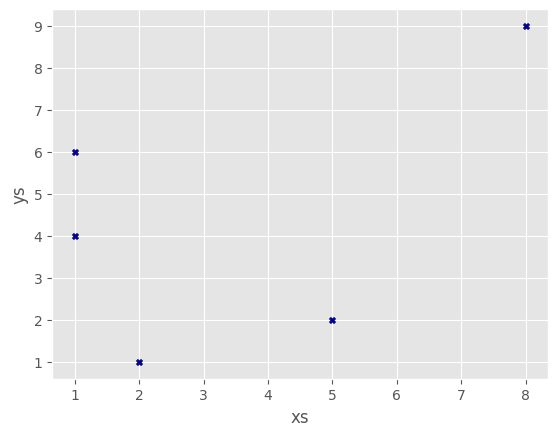

In [82]:
ax1 = df.plot.scatter(x="xs",y="ys",c='DarkBlue',marker='X')

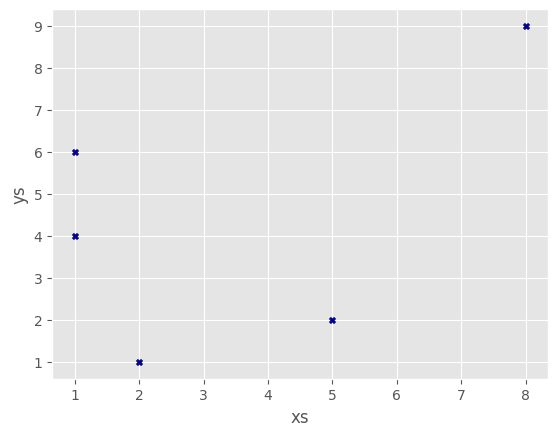

In [83]:
ax1 = df.plot.scatter("xs","ys",c='DarkBlue',marker='X')

# 61. Columns in your DataFrame can also be used to modify colors and sizes. Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning. Make a plot which incorporates all four features of this DataFrame.

(Hint: If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

The chart doesn't have to be pretty: this isn't a course in data viz!
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],<br>
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],<br>
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],<br>
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

In [84]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

<Axes: xlabel='productivity', ylabel='hours_in'>

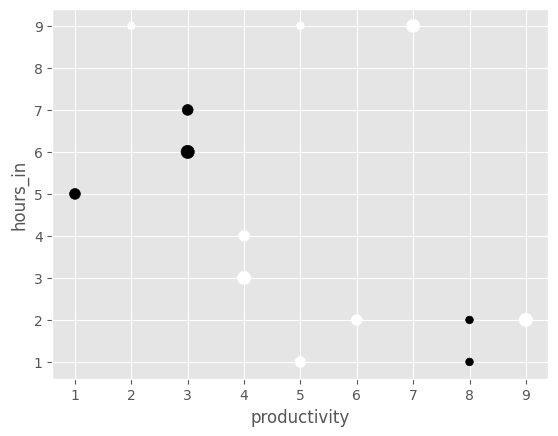

In [85]:
df.plot.scatter( "productivity", 'hours_in', s=df.happiness*30 ,c=df.caffienated)

# 62. What if we want to plot multiple things? Pandas allows you to pass in a matplotlib Axis object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)
<br>
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],<br>
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],<br>
                   "month":range(12)
                  })

In [86]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

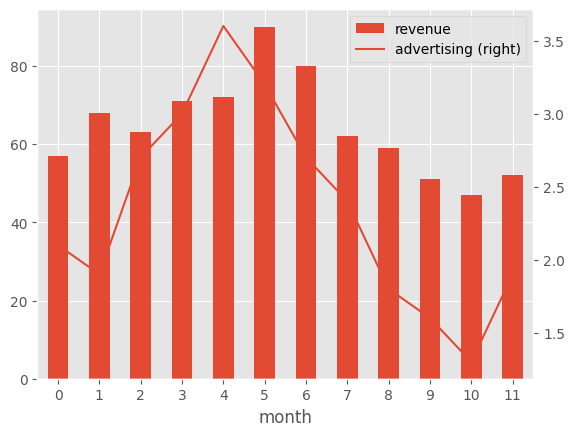

In [87]:
ax = df.plot.bar( 'month', 'revenue')

df.plot.line('month', 'advertising',secondary_y=True,ax=ax)
plt.show()

In [88]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

# 63. Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [89]:
df =day_stock_data()
df.head()

C:\Users\Sneha Karkoli\AppData\Local\Temp\ipykernel_5584\990691206.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.time = pd.to_datetime(df.time)


,time,price
0,2025-03-09 09:30:00,100.000000
1,2025-03-09 09:30:01,99.931624
2,2025-03-09 09:30:01,99.982304
3,2025-03-09 09:30:05,100.080772
4,2025-03-09 09:30:08,100.010582


In [90]:
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

C:\Users\Sneha Karkoli\AppData\Local\Temp\ipykernel_5584\2288980865.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  agg = df.resample("H").ohlc()


,open,high,low,close,color
time,,,,,
2025-03-09 09:00:00,100.000000,102.101356,99.737252,102.101356,green
2025-03-09 10:00:00,102.020978,102.499765,100.389035,100.674236,red
2025-03-09 11:00:00,100.743255,105.308252,99.863319,104.721996,green
2025-03-09 12:00:00,104.624196,104.852102,102.307995,103.750606,red
2025-03-09 13:00:00,103.695823,107.977346,102.892417,107.194831,green


# 64. Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart. Use the plot_candlestick(df) function above, or matplotlib's plot documentation if you get stuck.

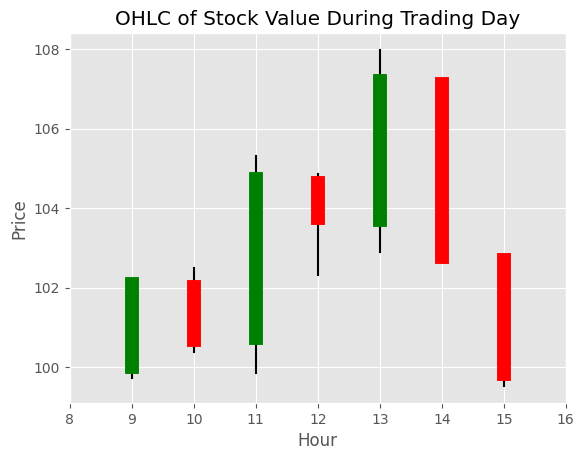

In [91]:
plot_candlestick(agg)

# 65.create a DataFrame from a dictionary.

In [101]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva','Gargi'], 'Age': [25, 30, 35,42,32,51], 'Salary': [50000, 60000, 70000,61000,50100,45600]}
df = pd.DataFrame(data)
print(df)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000
3    David   42   61000
4      Eva   32   50100
5    Gargi   51   45600


# 66. Display the first and last 5 rows of a DataFrame.

In [102]:
print(df.head())  
print(df.tail()) 

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000
3    David   42   61000
4      Eva   32   50100
      Name  Age  Salary
1      Bob   30   60000
2  Charlie   35   70000
3    David   42   61000
4      Eva   32   50100
5    Gargi   51   45600


# 67. Get the shape (number of rows and columns) of a DataFrame.

In [103]:
print(df.shape)

(6, 3)


# 68. Get basic statistics of numerical columns.

In [104]:
print(df.describe())

             Age        Salary
count   6.000000      6.000000
mean   35.833333  56116.666667
std     9.325592   9120.179092
min    25.000000  45600.000000
25%    30.500000  50025.000000
50%    33.500000  55050.000000
75%    40.250000  60750.000000
max    51.000000  70000.000000


# 69. Rename columns of a DataFrame.

In [105]:
df.rename(columns={'Age': 'Years', 'Salary': 'Income'}, inplace=True)

In [106]:
print(df)

      Name  Years  Income
0    Alice     25   50000
1      Bob     30   60000
2  Charlie     35   70000
3    David     42   61000
4      Eva     32   50100
5    Gargi     51   45600


# 70. Select a single column.

In [110]:
print(df['Years'])

0    25
1    30
2    35
3    42
4    32
5    51
Name: Years, dtype: int64


# 71. Select multiple columns.

In [112]:
print(df[['Name', 'Income']])

      Name  Income
0    Alice   50000
1      Bob   60000
2  Charlie   70000
3    David   61000
4      Eva   50100
5    Gargi   45600


# 72. Filter rows where Name is 'Alice'.

In [113]:
print(df[df['Name'] == 'Alice'])

    Name  Years  Income
0  Alice     25   50000


# 73. Filter rows based on multiple conditions

In [115]:
print(df[(df['Years'] > 25) & (df['Income'] > 50000)])

      Name  Years  Income
1      Bob     30   60000
2  Charlie     35   70000
3    David     42   61000
4      Eva     32   50100


# 74. Filter rows where Name contains 'bo'.

In [116]:
print(df[df['Name'].str.contains('bo', case=False)])

  Name  Years  Income
1  Bob     30   60000


# 75. Sort a DataFrame by Income in ascending order.

In [118]:
print(df.sort_values('Income'))

      Name  Years  Income
5    Gargi     51   45600
0    Alice     25   50000
4      Eva     32   50100
1      Bob     30   60000
3    David     42   61000
2  Charlie     35   70000


# 76. Find unique values in a column.

In [119]:
print(df['Years'].unique())

[25 30 35 42 32 51]


# 77. Count occurrences of unique values.

In [121]:
print(df['Years'].value_counts())

Years
25    1
30    1
35    1
42    1
32    1
51    1
Name: count, dtype: int64


# 78. Check if a column contains null values.

In [123]:
print(df['Years'].isnull().any())

False


# 79. Remove duplicate rows.

In [126]:
df.drop_duplicates(inplace=True)

In [139]:
df.rename(columns={'Years': 'Age', 'Income': 'Salary'}, inplace=True)

# 80. Group by Name and compute mean Salary

In [140]:
print(df.groupby('Name')['Salary'].mean())

Name
Alice      50000.0
Bob        60000.0
Charlie    70000.0
David      61000.0
Eva        50100.0
Gargi      45600.0
Name: Salary, dtype: float64


# 81. Count the number of occurrences of each Name

In [141]:
print(df['Name'].value_counts())

Name
Alice      1
Bob        1
Charlie    1
David      1
Eva        1
Gargi      1
Name: count, dtype: int64


# 82. Aggregate multiple statistics.

In [142]:
print(df.groupby('Name').agg({'Salary': ['sum', 'mean', 'max']}))

        Salary                
           sum     mean    max
Name                          
Alice    50000  50000.0  50000
Bob      60000  60000.0  60000
Charlie  70000  70000.0  70000
David    61000  61000.0  61000
Eva      50100  50100.0  50100
Gargi    45600  45600.0  45600


# 83. Group by multiple columns and apply aggregation.

In [143]:
print(df.groupby(['Name', 'Age'])['Salary'].sum())

Name     Age
Alice    25     50000
Bob      30     60000
Charlie  35     70000
David    42     61000
Eva      32     50100
Gargi    51     45600
Name: Salary, dtype: int64


# 84. Compute cumulative sum of Salary.

In [145]:
df['Cumulative Salary'] = df['Salary'].cumsum()
print(df['Cumulative Salary'])

0     50000
1    110000
2    180000
3    241000
4    291100
5    336700
Name: Cumulative Salary, dtype: int64


# 85. Compute rolling average.

In [137]:
df['Rolling Mean'] = df['Salary'].rolling(window=2).mean()
print(df['Rolling Mean'])

0        NaN
1    55000.0
2    65000.0
3    65500.0
4    55550.0
5    47850.0
Name: Rolling Mean, dtype: float64


# 86. Apply a custom function to a column.

In [135]:
df['New Age'] = df['Age'].apply(lambda x: x + 5)

In [136]:
print(df['New Age'])

0    30
1    35
2    40
3    47
4    37
5    56
Name: New Age, dtype: int64


# 87. Use .map() to transform values.

In [147]:
df['Salary'] = df['Salary'].map(lambda x: x * 1.1)
print(df['Salary'])

0    60500.0
1    72600.0
2    84700.0
3    73810.0
4    60621.0
5    55176.0
Name: Salary, dtype: float64


# 88. Use .replace() to substitute values.

In [148]:
df['Name'] = df['Name'].replace({'Alice': 'Alicia'})
print(df['Name'])

0     Alicia
1        Bob
2    Charlie
3      David
4        Eva
5      Gargi
Name: Name, dtype: object


# 89. Create a pivot table.

In [149]:
print(df.pivot_table(values='Salary', index='Name', columns='Age'))

Age           25       30       32       35       42       51
Name                                                         
Alicia   60500.0      NaN      NaN      NaN      NaN      NaN
Bob          NaN  72600.0      NaN      NaN      NaN      NaN
Charlie      NaN      NaN      NaN  84700.0      NaN      NaN
David        NaN      NaN      NaN      NaN  73810.0      NaN
Eva          NaN      NaN  60621.0      NaN      NaN      NaN
Gargi        NaN      NaN      NaN      NaN      NaN  55176.0


# 90. Create second DataFrame for merging

In [150]:
df2 = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'], 'Department': ['HR', 'IT', 'Finance']})


# 91. Concatenate two DataFrames along rows.

In [152]:
df_concat = pd.concat([df, df2], axis=0)
print(df_concat)

      Name   Age   Salary  Cumulative Salary  Rolling Mean  New Age Department
0   Alicia  25.0  60500.0            50000.0           NaN     30.0        NaN
1      Bob  30.0  72600.0           110000.0       55000.0     35.0        NaN
2  Charlie  35.0  84700.0           180000.0       65000.0     40.0        NaN
3    David  42.0  73810.0           241000.0       65500.0     47.0        NaN
4      Eva  32.0  60621.0           291100.0       55550.0     37.0        NaN
5    Gargi  51.0  55176.0           336700.0       47850.0     56.0        NaN
0    Alice   NaN      NaN                NaN           NaN      NaN         HR
1      Bob   NaN      NaN                NaN           NaN      NaN         IT
2  Charlie   NaN      NaN                NaN           NaN      NaN    Finance


# 92. Concatenate two DataFrames along columns.

In [154]:
df_concat = pd.concat([df, df2], axis=1)
print(df_concat)

      Name  Age   Salary  Cumulative Salary  Rolling Mean  New Age     Name  \
0   Alicia   25  60500.0              50000           NaN       30    Alice   
1      Bob   30  72600.0             110000       55000.0       35      Bob   
2  Charlie   35  84700.0             180000       65000.0       40  Charlie   
3    David   42  73810.0             241000       65500.0       47      NaN   
4      Eva   32  60621.0             291100       55550.0       37      NaN   
5    Gargi   51  55176.0             336700       47850.0       56      NaN   

  Department  
0         HR  
1         IT  
2    Finance  
3        NaN  
4        NaN  
5        NaN  


# 93. Merge using an inner join.

In [155]:
df_merged = pd.merge(df, df2, on='Name', how='inner')
print(df_merged)

      Name  Age   Salary  Cumulative Salary  Rolling Mean  New Age Department
0      Bob   30  72600.0             110000       55000.0       35         IT
1  Charlie   35  84700.0             180000       65000.0       40    Finance


# 94. Merge using a left join.

In [156]:
df_merged = pd.merge(df, df2, on='Name', how='left')
print(df_merged)

      Name  Age   Salary  Cumulative Salary  Rolling Mean  New Age Department
0   Alicia   25  60500.0              50000           NaN       30        NaN
1      Bob   30  72600.0             110000       55000.0       35         IT
2  Charlie   35  84700.0             180000       65000.0       40    Finance
3    David   42  73810.0             241000       65500.0       47        NaN
4      Eva   32  60621.0             291100       55550.0       37        NaN
5    Gargi   51  55176.0             336700       47850.0       56        NaN


# 95. Merge using a right join.

In [158]:
df_merged = pd.merge(df, df2, on='Name', how='right')
print(df_merged)

      Name   Age   Salary  Cumulative Salary  Rolling Mean  New Age Department
0    Alice   NaN      NaN                NaN           NaN      NaN         HR
1      Bob  30.0  72600.0           110000.0       55000.0     35.0         IT
2  Charlie  35.0  84700.0           180000.0       65000.0     40.0    Finance


# 96. Merge using an outer join.

In [159]:
df_merged = pd.merge(df, df2, on='Name', how='outer')
print(df_merged)

      Name   Age   Salary  Cumulative Salary  Rolling Mean  New Age Department
0    Alice   NaN      NaN                NaN           NaN      NaN         HR
1   Alicia  25.0  60500.0            50000.0           NaN     30.0        NaN
2      Bob  30.0  72600.0           110000.0       55000.0     35.0         IT
3  Charlie  35.0  84700.0           180000.0       65000.0     40.0    Finance
4    David  42.0  73810.0           241000.0       65500.0     47.0        NaN
5      Eva  32.0  60621.0           291100.0       55550.0     37.0        NaN
6    Gargi  51.0  55176.0           336700.0       47850.0     56.0        NaN


# 97. Perform a lookup using merge.

In [160]:
lookup = pd.DataFrame({'Name': ['Alice', 'Bob'], 'Bonus': [5000, 7000]})
df_merged = pd.merge(df, lookup, on='Name', how='left')
print(df_merged)

      Name  Age   Salary  Cumulative Salary  Rolling Mean  New Age   Bonus
0   Alicia   25  60500.0              50000           NaN       30     NaN
1      Bob   30  72600.0             110000       55000.0       35  7000.0
2  Charlie   35  84700.0             180000       65000.0       40     NaN
3    David   42  73810.0             241000       65500.0       47     NaN
4      Eva   32  60621.0             291100       55550.0       37     NaN
5    Gargi   51  55176.0             336700       47850.0       56     NaN


# 98. Use .merge() to combine multiple datasets.

In [161]:
df_final = df.merge(df2, on='Name').merge(lookup, on='Name')
print(df_final)

  Name  Age   Salary  Cumulative Salary  Rolling Mean  New Age Department  \
0  Bob   30  72600.0             110000       55000.0       35         IT   

   Bonus  
0   7000  


# 99. Use .join() to merge on index.

In [162]:
df.set_index('Name', inplace=True)
df2.set_index('Name', inplace=True)
df_joined = df.join(df2)
print(df_joined)

         Age   Salary  Cumulative Salary  Rolling Mean  New Age Department
Name                                                                      
Alicia    25  60500.0              50000           NaN       30        NaN
Bob       30  72600.0             110000       55000.0       35         IT
Charlie   35  84700.0             180000       65000.0       40    Finance
David     42  73810.0             241000       65500.0       47        NaN
Eva       32  60621.0             291100       55550.0       37        NaN
Gargi     51  55176.0             336700       47850.0       56        NaN


# 100. Reset and set index.

In [163]:
df.reset_index(inplace=True)
df.set_index('Age', inplace=True)
print(df.reset_index)

<bound method DataFrame.reset_index of         Name   Salary  Cumulative Salary  Rolling Mean  New Age
Age                                                            
25    Alicia  60500.0              50000           NaN       30
30       Bob  72600.0             110000       55000.0       35
35   Charlie  84700.0             180000       65000.0       40
42     David  73810.0             241000       65500.0       47
32       Eva  60621.0             291100       55550.0       37
51     Gargi  55176.0             336700       47850.0       56>
